# Setup and Fetch Data

Press the play button in Google Colab or press `Shift+Enter` execute the cell below to download and load the data and packages for this assignment

This will load four `pandas` `DataFrame` objects: `shampoo`,`housing`, `airline`, and `airline_series`.
Each of these is used in Makridakis Chapter 3. 

In [1]:
import pandas as pd
from numpy import log, abs, mean, exp
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16



!curl https://raw.githubusercontent.com/ZacharySBrown/vcu-scma440-2021q1/master/utils/fetch_e3.sh > fetch_e3.sh
!bash fetch_e3.sh

# Example
shampoo = pd.read_csv('shampoo_sales.csv', parse_dates=['date']).set_index('date')
housing = pd.read_csv('housing_sales.csv', parse_dates=['date']).set_index('date')
airline = pd.read_csv('airline.csv').set_index('year')
airline_series = pd.read_csv('airline_series.csv', parse_dates=['date']).set_index('date')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   380  100   380    0     0   4470      0 --:--:-- --:--:-- --:--:--  4523
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   629  100   629    0     0   4591      0 --:--:-- --:--:-- --:--:--  4557
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3867  100  3867    0     0  35805      0 --:--:-- --:--:-- --:--:-- 35805
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   456  100   456    0     0   5700      0 --:--:-- --:--:-- --:--:--  5700
  % Total    % Received % Xferd  Average Speed   Tim

# Inspecting the Data

We'll start out with a simple time series plot of the `housing` `DataFrame`

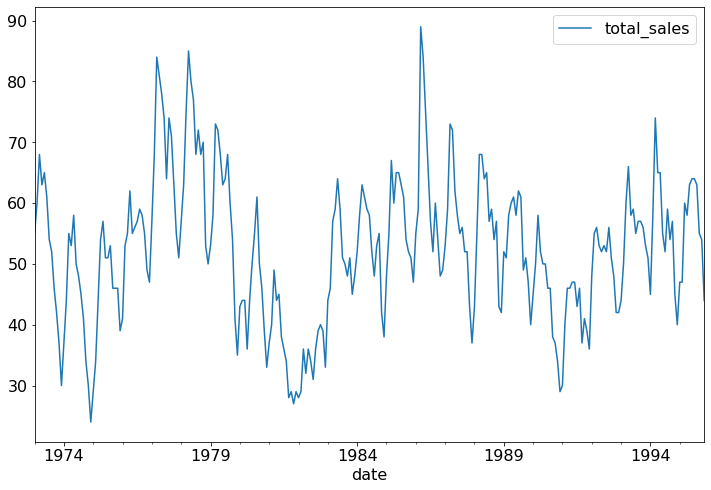

In [3]:
housing.plot()

# Estimating the Trend

The first thing that we want to do is to estimate the trend-cycle. To do this, we'll use a **12MA** smoother

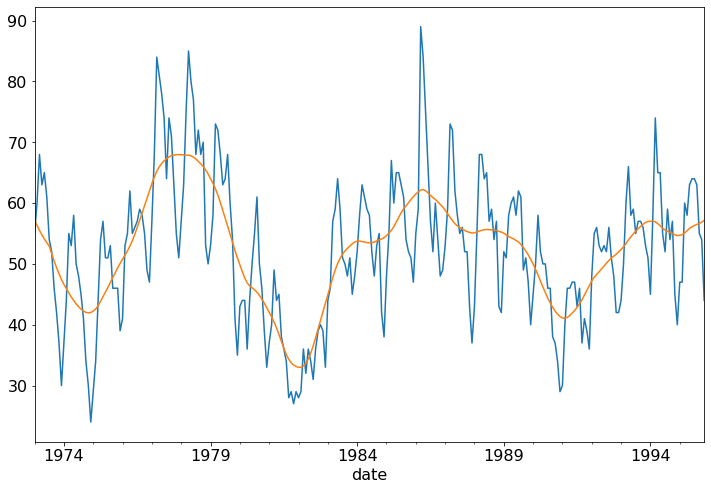

In [5]:
housing['12MA'] = housing['total_sales'].rolling(12, center=True, min_periods=1).mean().shift(-1)
housing['trend_cycle'] = housing['12MA'].rolling(12, center=True, min_periods=1).mean()

housing['total_sales'].plot()
housing['trend_cycle'].plot()


# Creating De-trended Data

We'll assume an additive model, so in order to de-trend the data, we need to subtract the trend-cycle from the original time series, leaving us with the seasonal and irregular

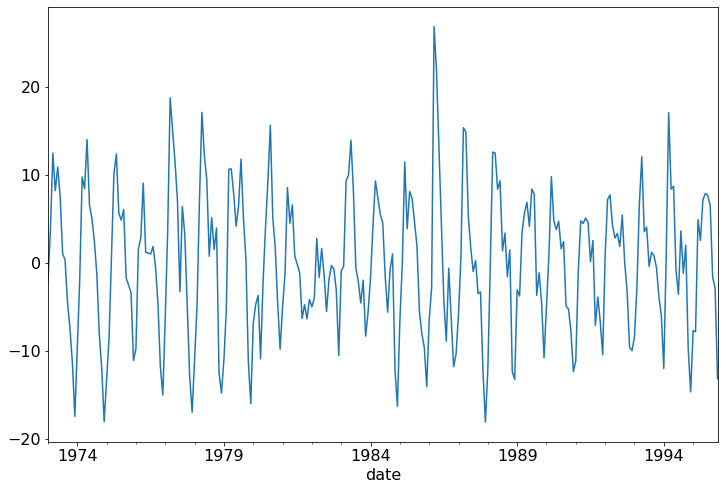

In [7]:
housing['detrended'] = housing['total_sales'] - housing['trend_cycle']
housing['detrended'].plot()

# Estimating the Seasonal

To estimate the seasonal, we'll assume that the seasonal indices remain constant year-to-year. 
Under this assumption, we can simply average the monthly values across years to generate the seasonal index.

To calculate the average over months, we'll first want to group our data by months (ignoring years), then calculate the mean value for each particular month. 

We can access the month for each row with `housing.index.month`, which will return integer index of the momth for that date. 


To group by this month, we'll use the `pandas` `.groupby()` function, which will group by the column (in this case, the month from the index) that we pass to it. 

We'll then need to select the column that we want to take the average of (in this case, the detrended data), and call the `.mean()` function. This is carried out below. 

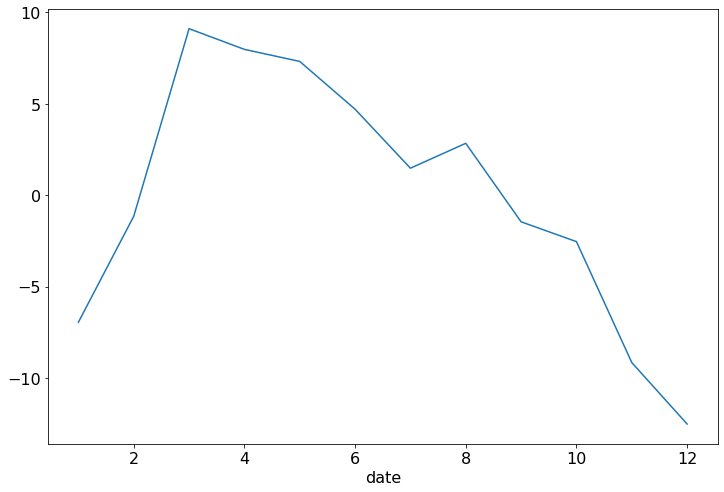

In [11]:
seasonal_indices = housing.groupby(housing.index.month)['detrended'].mean()

seasonal_indices.plot()

Our assumption that the seasonal is constant across years led us to only calculate a set of seasonal indices for a one year period. We'll want to repeat this for the length of the entire time series, and make sure that the length of our repeated seasonal is the same as the number of observations. To do this we'll need to:

1. Repeat the seasonal indices 23 times (the number of years in the data)
2. Limit the _repeated_ seasonal to be the same number of observations as the original time series. *Note that the original time series ends in November, so the last year is one month short*
3. Set the repeated, length-corrected seasonal to be a new column in our `housing` `DataFrame`

For step 1, we'll use the function `pd.np.tile(data, (23))` to repeat the data 23 times.
For step 2, we'll use the `.shape[0]` function of our `housing` `DataFrame` to get the number of observations, then use the syntax `seasonal_repeated[0:N]` limit our repeated data to the first N observations. 

Lastly, we'll simply assign our repeated data back to a column in the `housing` `Dataframe`

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


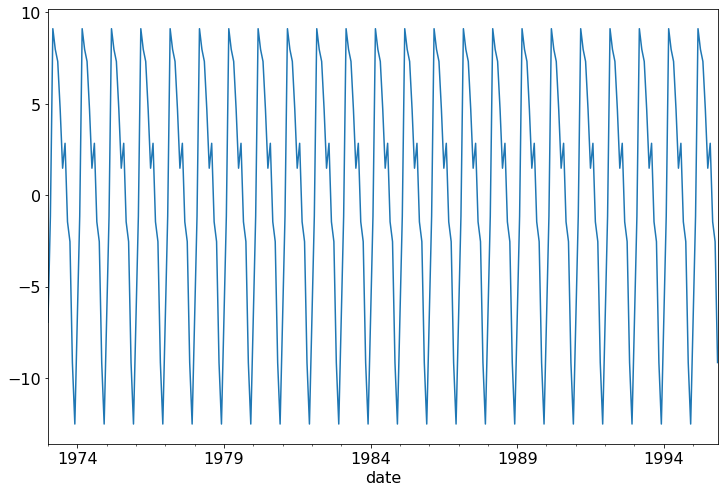

In [41]:
seasonal_repeated = pd.np.tile(seasonal_indices, (23))

number_observations = housing.shape[0]

seasonal_repeated = seasonal_repeated[0:number_observations]

housing['seasonal'] = seasonal_repeated

housing['seasonal'].plot()

# Calculating the Irregular

To calculate the irregular, we simply need to subtract the trend-cycle and the seasonal from the original time series. 

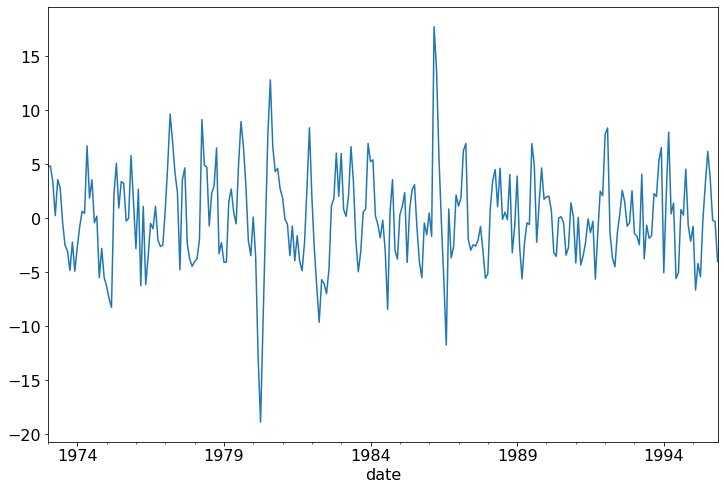

In [40]:
housing['irregular'] = housing['total_sales'] - housing['trend_cycle'] - housing['seasonal']

housing['irregular'].plot()

# Putting It All Together

Let's now plot all of the components. 

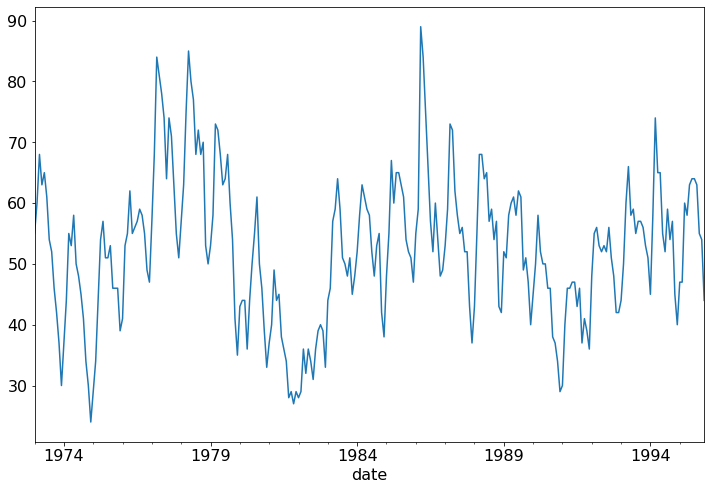

In [42]:
housing['total_sales'].plot()

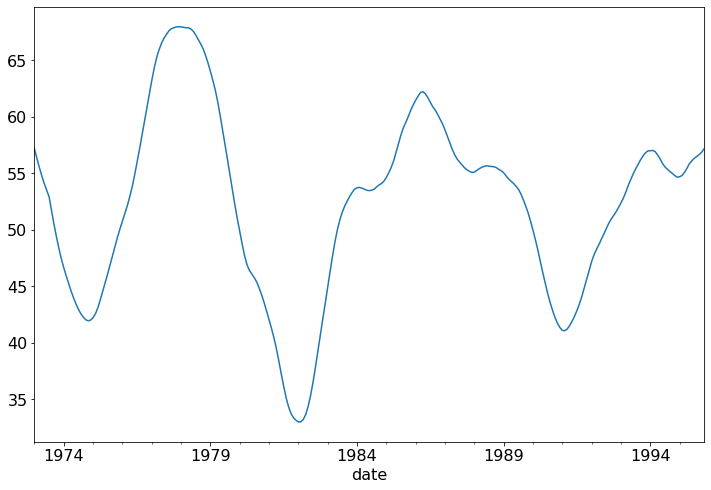

In [43]:
housing['trend_cycle'].plot()

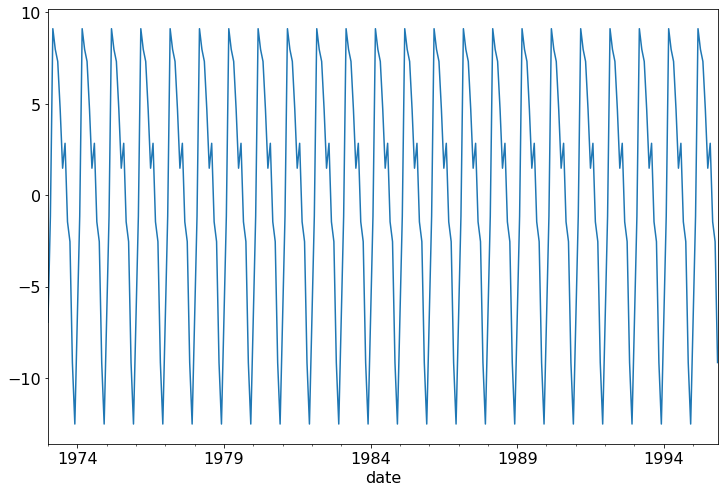

In [44]:
housing['seasonal'].plot()

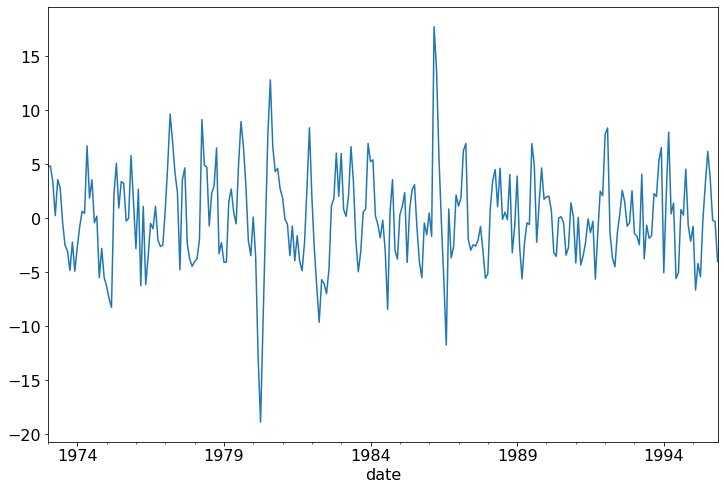

In [45]:
housing['irregular'].plot()